# Conflicts time-series dataset released by ACLED

Link to Conflicts data released by ACLED: https://www.acleddata.com/data/

For more details about the data: https://www.acleddata.com/resources/general-guides/

In [2]:
import pandas as pd
import numpy as np
import ntpath
import glob
# Set a value for the column width in order to not view dataframe too bulky.
pd.options.display.max_colwidth = 20

In [3]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from map_plot import draw_adminstratas
from TsIP.TsIP import TsIP

In [4]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

# YEM, NGA, SYR, BFA

The data of four countries are provided: *Yemen* (YEM), *Nigeria* (NGA), *Syria* (SYR) and *Burkina Faso* (BFA).

In [5]:
# Read the data released by ACLED regarding the conflicts indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
print("The data released by ACLED:")
df.head()

The data released by ACLED:


,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,Country
0,7153025,854,BFO3861,3861,04 July 2020,2020,1,Battles,Armed clash,Islamic State (G...,...,12.9265,0.7430,2,Sahel Security A...,New media-National,"On 4 July 2020, ...",1,1594063538,BFA,Burkina Faso
1,7153645,854,BFO3860,3860,04 July 2020,2020,1,Battles,Armed clash,JNIM: Group for ...,...,12.6672,-3.6123,1,Whatsapp,New media,"On 4 July 2020, ...",0,1594063540,BFA,Burkina Faso
2,7153619,854,BFO3859,3859,03 July 2020,2020,1,Battles,Armed clash,JNIM: Group for ...,...,15.0652,-0.4596,2,Undisclosed Source,Local partner-Other,"On 3 July 2020, ...",0,1594063540,BFA,Burkina Faso
3,7153309,854,BFO3858,3858,02 July 2020,2020,1,Violence against...,Attack,Military Forces ...,...,11.9423,1.3821,1,Facebook,New media,"On 2 July 2020, ...",6,1594063539,BFA,Burkina Faso
4,7153515,854,BFO3855,3855,01 July 2020,2020,1,Protests,Peaceful protest,Protesters (Burk...,...,12.3703,-1.5247,1,Radio Omega,National,"On 1 July 2020, ...",0,1594063539,BFA,Burkina Faso


### Brief items description

- *data_id*: an individual date numeric	identifier.
- *iso*: a numeric code	for	each individual	country.
- *event_id_cnty*: an individual identifier	by number and country acronym (updated annually).
- *event_id_no_cnty*: an individual	numeric	identifier (updated	annually).
- *event_date*: the	day, month and year	on which an	event took place.
- *year*: the year in which	an event took place.
- *time_precision*: a numeric code indicating the level	of certainty of	the	date coded for the event.
- *event_type*: the	type of	event.
- *sub_event_type*: the	type of	sub-event.
- *actor1*: the	named actor	involved in	the	event.
- *assoc_actor_1*: the named actor associated with or identifying actor1.
- *inter1*: a numeric code indicating the type of actor1.
- *actor2*: the	named actor	involved in	the	event.
- *assoc_actor_2*: the named actor associated with or identifying actor2.
- *inter2*: a numeric code indicating the type of actor2.
- *interaction*: a numeric code	indicating the interaction between types of	actor1 and actor2.
- *region*: the	region of the world	where the event	took place.
- *country*: the country in	which the event	took place.
- *admin1*: the	largest	sub-national administrative	region in which	the	event took place.
- *admin2*: the	second largest sub-national	administrative region in which the event took place.
- *admin3*: the	third largest sub-national administrative region in	which the event	too place.
- *location*: the location in which	the	event took place.
- *latitude*: the latitude of the location.
- *longitude*: the longitude of	the	location.
- *geo_precision*: a numeric code indicating the level of certainty	of the location coded for the event.
- *source*: the	source of the event	report.
- *source scale*: the scale	(local,	regional, national,	international) of the source.
- *notes*: a short description of the event.
- *fatalities*: the	number of reported fatalities which	occurred during	the	event.

ACLED currently	codes six types	of events, both	violent	and	non-violent, that may occur during a conflict. These include:
- *Battles*: violent interactions between two organised armed groups;
- *Explosions/Remote violence*: one-sided violence events in which the tool for	engaging in	conflict creates asymmetry by taking away the ability of the target	to respond;
- *Violence against civilians*: violent	events where an	organised armed	group deliberately inflicts	violence upon unarmed non-combatants;
- *Protests*: a public demonstration against a political entity, government	institution, policy	or group in	which the participants are not violent;
- *Riots*: violent events where	demonstrators or mobs engage in	disruptive acts	or disorganised	acts of	violence against property or people;
- *Strategic development*: accounts	for often non-violent activity by conflict and other agents	within the context of the war/dispute. Recruitment,	looting	and	arrests	are	included.

In [6]:
# Keep only some features/items and raname them.
df = df[["Country", "event_date", "event_type", "sub_event_type", "admin1", "fatalities"]]
df.rename(columns = {"event_date": "Datetime", "event_type": "Event type", "sub_event_type": "Subevent type", "admin1": "AdminStrata", "fatalities": "Fatalities"}, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities
0,Burkina Faso,04 July 2020,Battles,Armed clash,Est,1
1,Burkina Faso,04 July 2020,Battles,Armed clash,Boucle du Mouhoun,0
2,Burkina Faso,03 July 2020,Battles,Armed clash,Sahel,0
3,Burkina Faso,02 July 2020,Violence against...,Attack,Est,6
4,Burkina Faso,01 July 2020,Protests,Peaceful protest,Centre,0


### Country item

In [7]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata item

In [8]:
# Rename the name of some AdminStrata according to the fcs and rcsi names (and also shapefiles) of the AdminStrata.
df.replace(["Lahij", "Sanaa", "Sadah", "Hadramawt", "Al Mahrah", "Suqutra", "Ad Dali", "Amanat al Asimah"], 
           ["Lahj", "Sana'a", "Sa'ada", "Hadramaut", "Al Maharah", "Socotra", "Al Dhale'e", "Amanat Al Asimah"], inplace = True)
df.replace(["Boucle du Mouhoun", "Nassarawa"], ["Boucle-Du-Mouhoun", "Nasarawa"], inplace = True)

In [9]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The Conflicts dataframe has the values of all the governorates.

In [10]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', "Al Dhale'e", 'Al Bayda', 'Al Hudaydah', 'Amran', 'Marib',
       'Taizz', "Sana'a", 'Hadramaut', 'Al Jawf', 'Hajjah', "Sa'ada",
       'Ibb', 'Lahj', 'Shabwah', 'Aden', 'Amanat Al Asimah', 'Al Maharah',
       'Dhamar', 'Socotra', 'Al Mahwit', 'Raymah'], dtype=object)

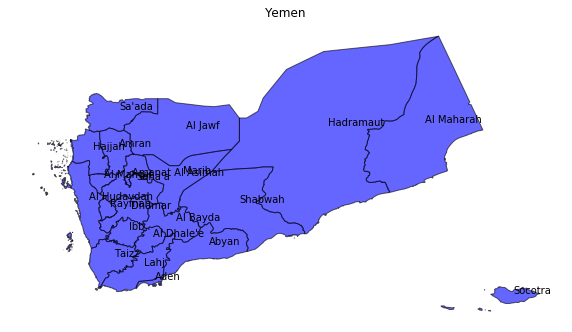

In [11]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), annotation = True)

- **Nigeria**: Nigeria is divided into 36 states. It also includes *The Federal Capital Territory* that is not a state and it is under the direct control of the federal government. The Conflicts dataframe has the values of all 37 governatores.

In [12]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(37,)


array(['Nasarawa', 'Katsina', 'Borno', 'Anambra', 'Enugu', 'Akwa Ibom',
       'Taraba', 'Delta', 'Ondo', 'Yobe', 'Niger', 'Kaduna', 'Zamfara',
       'Ebonyi', 'Osun', 'Kogi', 'Lagos', 'Edo', 'Imo', 'Oyo', 'Ogun',
       'Bauchi', 'Adamawa', 'Benue', 'Plateau',
       'Federal Capital Territory', 'Kano', 'Cross River', 'Ekiti',
       'Jigawa', 'Abia', 'Rivers', 'Sokoto', 'Kwara', 'Kebbi', 'Bayelsa',
       'Gombe'], dtype=object)

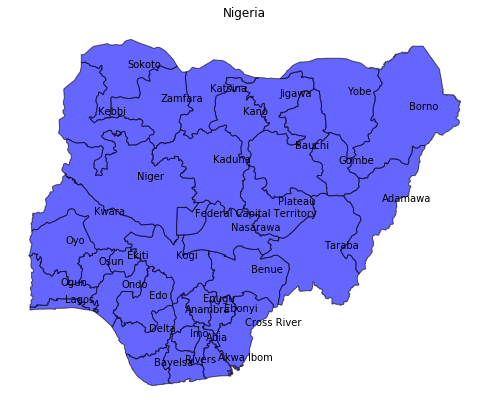

In [13]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True)

- **Syria**: the governatores of the Syria country are 14. The Conflicts dataframe has the values of all 14 governatores.

In [14]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Al-Hasakeh', 'Aleppo', 'Homs', "Dar'a", 'Idleb', 'Deir-ez-Zor',
       'Ar-Raqqa', 'Hama', 'Quneitra', 'Rural Damascus', 'Lattakia',
       'Damascus', 'As-Sweida', 'Tartous'], dtype=object)

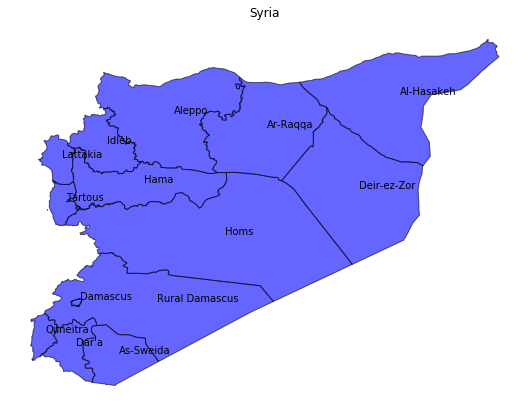

In [15]:
draw_adminstratas("Syria", AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), annotation = True)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The Conflicts dataframe has the values of all 13 regions.

In [16]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Est', 'Boucle-Du-Mouhoun', 'Sahel', 'Centre', 'Nord',
       'Centre-Ouest', 'Hauts-Bassins', 'Centre-Nord', 'Centre-Est',
       'Cascades', 'Sud-Ouest', 'Plateau-Central', 'Centre-Sud'],
      dtype=object)

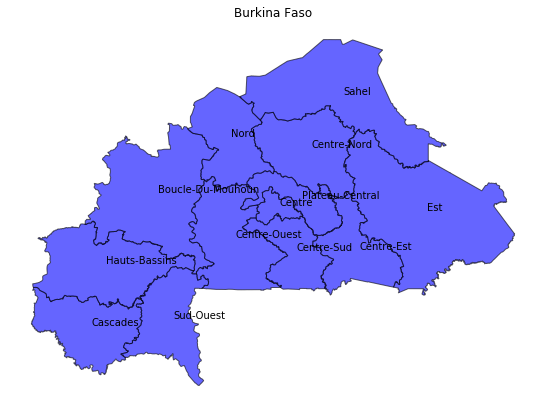

In [17]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), annotation = True)

In [18]:
# Convert to an appropriate datetime format.
df["Datetime"] = pd.to_datetime(df.Datetime)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Country,Datetime,Event type,Subevent type,AdminStrata,Fatalities
0,Yemen,2017-07-01,Explosions/Remot...,Air/drone strike,Abyan,3
1,Syria,2017-07-01,Battles,Armed clash,Rural Damascus,0
2,Syria,2017-07-01,Explosions/Remot...,Shelling/artille...,Quneitra,0
3,Syria,2017-07-01,Explosions/Remot...,Air/drone strike,Hama,0
4,Syria,2017-07-01,Explosions/Remot...,Shelling/artille...,Homs,0


In [19]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

Country          0
Datetime         0
Event type       0
Subevent type    0
AdminStrata      0
Fatalities       0
dtype: int64

In [20]:
# Create appropriate time-series subgroups with an appropriate datetime object resampled to day. 
df = df.groupby(["Country", "AdminStrata", "Event type", "Subevent type"]).apply(lambda group: group.set_index("Datetime").resample("D").sum()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Event type,Subevent type,Datetime,Fatalities
0,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2017-07-11,1
1,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2017-07-12,0
2,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2017-07-13,0
3,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2017-07-14,0
4,Burkina Faso,Boucle-Du-Mouhoun,Battles,Armed clash,2017-07-15,0


In [21]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df = df.set_index(["Datetime", "Country", "AdminStrata", "Event type", "Subevent type"]).unstack(["Country", "AdminStrata", "Event type", "Subevent type"])
df.columns = df.columns.droplevel(0)
freq = "D"
df.index.freq = freq
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2017-07-01                  NaN                  NaN            
2017-07-02                  NaN                  NaN            
2017-07-03                  NaN                  NaN            
2017-07-04                  NaN                  NaN            
2017-07-05                  NaN                  NaN            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2017-07-01                 NaN          NaN                  NaN    
2017-07-02                 NaN          NaN                  NaN    
2017-07-03                 NaN          NaN                  NaN    
2017-07-04                 NaN          NaN                  NaN    
2017-07-05                 NaN          NaN                  NaN    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2017-07-01                     NaN                    NaN           
2017-07-02                     NaN                    NaN           
2017-07-03                     NaN                    NaN           
2017-07-04                     NaN                    NaN           
2017-07-05                     NaN                    NaN           

Country                                                          ...  \
AdminStrata                                            Cascades  ...   
Event type        Violence against civilians            Battles  ...   
Subevent type Abduction/forced disappearance Attack Armed clash  ...   
Datetime                                                         ...   
2017-07-01                     NaN              NaN         NaN  ...   
2017-07-02                     NaN              NaN         NaN  ...   
2017-07-03                     NaN              NaN         NaN  ...   
2017-07-04                     NaN              NaN         NaN  ...   
2017-07-05                     NaN              NaN         NaN  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2017-07-01                     NaN                    NaN       
2017-07-02                     NaN                    NaN       
2017-07-03                     NaN                    NaN       
2017-07-04                     NaN                    NaN       
2017-07-05                     NaN                    NaN       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2017-07-01                     NaN                   NaN               
2017-07-02                     NaN                   NaN               
2017-07-03                     NaN                   NaN               
2017-07-04         

**N.B.** I decide to fill the NaN values with the value 0 (0 fatalities ascertained by the survey).

In [22]:
df.fillna(value = 0, inplace = True)
df.head()

Country            Burkina Faso                                \
AdminStrata   Boucle-Du-Mouhoun                                 
Event type              Battles    Explosions/Remote violence   
Subevent type       Armed clash Remote explosive/landmine/IED   
Datetime                                                        
2017-07-01                  0.0                  0.0            
2017-07-02                  0.0                  0.0            
2017-07-03                  0.0                  0.0            
2017-07-04                  0.0                  0.0            
2017-07-05                  0.0                  0.0            

Country                                                            \
AdminStrata                                                         
Event type            Protests        Riots                         
Subevent type Peaceful protest Mob violence Violent demonstration   
Datetime                                                            
2017-07-01                 0.0          0.0                  0.0    
2017-07-02                 0.0          0.0                  0.0    
2017-07-03                 0.0          0.0                  0.0    
2017-07-04                 0.0          0.0                  0.0    
2017-07-05                 0.0          0.0                  0.0    

Country                                                            \
AdminStrata                                                         
Event type    Strategic developments                                
Subevent type  Disrupted weapons use Looting/property destruction   
Datetime                                                            
2017-07-01                     0.0                    0.0           
2017-07-02                     0.0                    0.0           
2017-07-03                     0.0                    0.0           
2017-07-04                     0.0                    0.0           
2017-07-05                     0.0                    0.0           

Country                                                          ...  \
AdminStrata                                            Cascades  ...   
Event type        Violence against civilians            Battles  ...   
Subevent type Abduction/forced disappearance Attack Armed clash  ...   
Datetime                                                         ...   
2017-07-01                     0.0              0.0         0.0  ...   
2017-07-02                     0.0              0.0         0.0  ...   
2017-07-03                     0.0              0.0         0.0  ...   
2017-07-04                     0.0              0.0         0.0  ...   
2017-07-05                     0.0              0.0         0.0  ...   

Country                        Yemen                           \
AdminStrata                    Taizz                            
Event type    Strategic developments                            
Subevent type                Arrests Change to group/activity   
Datetime                                                        
2017-07-01                     0.0                    0.0       
2017-07-02                     0.0                    0.0       
2017-07-03                     0.0                    0.0       
2017-07-04                     0.0                    0.0       
2017-07-05                     0.0                    0.0       

Country                                                               \
AdminStrata                                                            
Event type                                                             
Subevent type Disrupted weapons use Headquarters or base established   
Datetime                                                               
2017-07-01                     0.0                   0.0               
2017-07-02                     0.0                   0.0               
2017-07-03                     0.0                   0.0               
2017-07-04         

In [23]:
# Plot time-series.
TsIP(df).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", 
                             first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [24]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [25]:
df.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts"));

Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.

In [26]:
# Reduce the Event tanking only the 'Event type' summing the corresponding 'Subevent type'.
df_event = df.groupby(level = [0, 1, 2], axis = 1).sum()
df_event.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun                                             
Event type            Battles Explosions/Remote violence Protests Riots   
Datetime                                                                  
2017-07-01                0.0                  0.0            0.0   0.0   
2017-07-02                0.0                  0.0            0.0   0.0   
2017-07-03                0.0                  0.0            0.0   0.0   
2017-07-04                0.0                  0.0            0.0   0.0   
2017-07-05                0.0                  0.0            0.0   0.0   

Country                                                                 \
AdminStrata                                                   Cascades   
Event type  Strategic developments Violence against civilians  Battles   
Datetime                                                                 
2017-07-01                   0.0                    0.0            0.0   
2017-07-02                   0.0                    0.0            0.0   
2017-07-03                   0.0                    0.0            0.0   
2017-07-04                   0.0                    0.0            0.0   
2017-07-05                   0.0                    0.0            0.0   

Country                                                ...    Yemen        \
AdminStrata                                            ...  Socotra         
Event type  Explosions/Remote violence Protests Riots  ... Protests Riots   
Datetime                                               ...                  
2017-07-01                   0.0            0.0   0.0  ...      0.0   0.0   
2017-07-02                   0.0            0.0   0.0  ...      0.0   0.0   
2017-07-03                   0.0            0.0   0.0  ...      0.0   0.0   
2017-07-04                   0.0            0.0   0.0  ...      0.0   0.0   
2017-07-05                   0.0            0.0   0.0  ...      0.0   0.0   

Country                                                                \
AdminStrata                                                     Taizz   
Event type  Strategic developments Violence against civilians Battles   
Datetime                                                                
2017-07-01                   0.0                    0.0          12.0   
2017-07-02                   0.0                    0.0           0.0   
2017-07-03                   0.0                    0.0           0.0   
2017-07-04                   0.0                    0.0          10.0   
2017-07-05                   0.0                    0.0           4.0   

Country                                                                       \
AdminStrata                                                                    
Event type  Explosions/Remote violence Protests Riots Strategic developments   
Datetime                                                                       
2017-07-01                  11.0            0.0   0.0                  0.0     
2017-07-02                  10.0            0.0   0.0                  0.0     
2017-07-03                   0.0            0.0   0.0                  0.0     
2017-07-04                  15.0            0.0   0.0                  0.0     
2017-07-05                   0.0            0.0   0.0                  0.0     

Country                                 
AdminStrata                             
Event type  Violence against civilians  
Datetime                                
2017-07-01                   0.0        
2017-07-02                   1.0        
2017-07-03                   0.0        
2017-07-04                   1.0        
2017-07-05                   0.0        

[5 rows x 468 columns]

In [27]:
# Plot time-series.
TsIP(df_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", 
                                   first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [28]:
df_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_event"));

## Unique conflict indicator

We decide to create a unique indicator for the conflict summin over all 'Event' types for each province.

In [29]:
# I decide to create a unique indicator for the conflict for each adminstrata.
def sum_event_fatalities(group):
    group = group.sum(axis = 1)
    return group

df_sum_event = df_event.groupby(level = [0, 1], axis = 1).apply(sum_event_fatalities)
df_sum_event.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple([x[0], x[1], "Fatality"]), df_sum_event.columns)))
df_sum_event.columns.names = ["Country", "AdminStrata", "Indicator"]
df_sum_event.head()

Country          Burkina Faso                                           \
AdminStrata Boucle-Du-Mouhoun Cascades   Centre Centre-Est Centre-Nord   
Indicator            Fatality Fatality Fatality   Fatality    Fatality   
Datetime                                                                 
2017-07-01                0.0      0.0      0.0        0.0         0.0   
2017-07-02                0.0      0.0      0.0        0.0         0.0   
2017-07-03                0.0      0.0      0.0        0.0         0.0   
2017-07-04                0.0      0.0      0.0        0.0         0.0   
2017-07-05                0.0      0.0      0.0        0.0         0.0   

Country                                                              ...  \
AdminStrata Centre-Ouest Centre-Sud      Est Hauts-Bassins     Nord  ...   
Indicator       Fatality   Fatality Fatality      Fatality Fatality  ...   
Datetime                                                             ...   
2017-07-01           0.0        0.0      0.0           0.0      0.0  ...   
2017-07-02           0.0        0.0      0.0           0.0      0.0  ...   
2017-07-03           0.0        0.0      0.0           0.0      0.0  ...   
2017-07-04           0.0        0.0      0.0           0.0      0.0  ...   
2017-07-05           0.0        0.0      0.0           0.0      0.0  ...   

Country        Yemen                                                        \
AdminStrata   Hajjah      Ibb     Lahj    Marib   Raymah   Sa'ada   Sana'a   
Indicator   Fatality Fatality Fatality Fatality Fatality Fatality Fatality   
Datetime                                                                     
2017-07-01       1.0      0.0      0.0     10.0      0.0      1.0      0.0   
2017-07-02      12.0      0.0      0.0     13.0      0.0      0.0      0.0   
2017-07-03      10.0      0.0      0.0      0.0      0.0     10.0      0.0   
2017-07-04       0.0      0.0      0.0     13.0      0.0      1.0      0.0   
2017-07-05       0.0      0.0      0.0      0.0      0.0      0.0      0.0   

Country                                 
AdminStrata  Shabwah  Socotra    Taizz  
Indicator   Fatality Fatality Fatality  
Datetime                                
2017-07-01      10.0      0.0     23.0  
2017-07-02       0.0      0.0     11.0  
2017-07-03       0.0      0.0      0.0  
2017-07-04       1.0      0.0     26.0  
2017-07-05       0.0      0.0      4.0  

[5 rows x 86 columns]

In [30]:
# Plot time-series.
TsIP(df_sum_event).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", 
                                       first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [31]:
df_sum_event.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_sum_event"));

Now, I adjust the current data according to the reference period of the data collection of the FCS indicator. The FCS survey uses a sliding window of 30 days past to determine the current value. 

In [32]:
SvyWindow = 30

In [33]:
df_sum_event_SvyWindow = df_sum_event.rolling(SvyWindow + 1).sum().dropna()
df_sum_event_SvyWindow.head()

Country          Burkina Faso                                           \
AdminStrata Boucle-Du-Mouhoun Cascades   Centre Centre-Est Centre-Nord   
Indicator            Fatality Fatality Fatality   Fatality    Fatality   
Datetime                                                                 
2017-07-31                1.0      0.0      0.0        0.0         0.0   
2017-08-01                1.0      0.0      0.0        0.0         0.0   
2017-08-02                1.0      0.0      0.0        0.0         0.0   
2017-08-03                1.0      0.0      0.0        0.0         0.0   
2017-08-04                1.0      0.0      0.0        0.0         0.0   

Country                                                              ...  \
AdminStrata Centre-Ouest Centre-Sud      Est Hauts-Bassins     Nord  ...   
Indicator       Fatality   Fatality Fatality      Fatality Fatality  ...   
Datetime                                                             ...   
2017-07-31           1.0        0.0      0.0           0.0      0.0  ...   
2017-08-01           1.0        0.0      0.0           0.0      0.0  ...   
2017-08-02           1.0        0.0      0.0           0.0      0.0  ...   
2017-08-03           1.0        0.0      0.0           0.0      0.0  ...   
2017-08-04           1.0        0.0      0.0           0.0      0.0  ...   

Country        Yemen                                                        \
AdminStrata   Hajjah      Ibb     Lahj    Marib   Raymah   Sa'ada   Sana'a   
Indicator   Fatality Fatality Fatality Fatality Fatality Fatality Fatality   
Datetime                                                                     
2017-07-31     113.0     14.0     46.0    156.0      0.0     74.0     83.0   
2017-08-01     112.0     14.0     56.0    146.0      0.0     75.0     83.0   
2017-08-02     100.0     14.0     56.0    133.0      0.0     75.0     83.0   
2017-08-03      90.0     14.0     56.0    133.0      0.0     65.0     83.0   
2017-08-04     116.0     14.0     66.0    121.0      0.0     78.0    113.0   

Country                                 
AdminStrata  Shabwah  Socotra    Taizz  
Indicator   Fatality Fatality Fatality  
Datetime                                
2017-07-31      93.0      0.0    502.0  
2017-08-01      83.0      0.0    492.0  
2017-08-02      93.0      0.0    491.0  
2017-08-03     100.0      0.0    506.0  
2017-08-04     107.0      0.0    528.0  

[5 rows x 86 columns]

In [34]:
# Plot time-series.
TsIP(df_sum_event_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Fatalities", 
                                                 first_last_valid_index_group = True)

interactive(children=(ToggleButtons(description='Country', options=('Burkina Faso', 'Nigeria', 'Syria', 'Yemen…

In [35]:
df_sum_event_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_conflicts_sum_event_SvyWindow"));